[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/Estadistica%20de%20Datos/notebook/practice/Practica_Estadistica.ipynb)

Estadística con Python
---

Como vimos en la unidad de Análisis Estadístico de Datos, podemos construir diferentes tipos de distribuciones, gracias a la simulación Monte Carlo.

En el siguiente ejercicio realizaremos una mezcla de los siguientes aspectos:

#### Creación de una muestra con "Ruido"

En este punto, debemos realizar la simulación numérica para construir datos sin "distribución" aparente, para posteriormente aplicar pruebas estadísticas (detección de outliers) y posteriormente realizar un análisis del antes y después.

Empezaremos con la construcción de una muestra con distribución normal

crearMuestra(mu, sigma), esta función devuelve una nueva muestra generada con parámetros de tendencia central mu (o media) y sigma (o desviación estándar).

In [0]:
import numpy as np # importando numpy
import seaborn as sns

def crearMuestra(mu, sigma, size):
    np.random.seed(158344) # para poder replicar el random
    datos = np.random.normal(mu, sigma, size)
    return datos

In [0]:
#Construimos 4 conjunto de datos
datos_1 = crearMuestra(5, 10, 20)
datos_2 = crearMuestra(20, 30, 30)
datos_3 = crearMuestra(3, 7, 45)
datos_4 = crearMuestra(6, 12, 15)

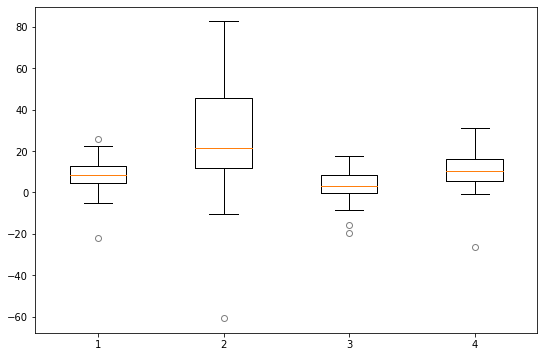

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt # importando matplotlib

y_data = [datos_1, datos_2, datos_3, datos_4]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(y_data) 

for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)


In [18]:
#Me encontré esta formita de graficar :P
%matplotlib inline 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

x_data = ['datos_1', 'datos_2', 'datos_3', 'datos_4']
y_data = [datos_1, datos_2, datos_3, datos_4]
colors = ['#d8b9c3', '#fb7b6b', '#a4c5c6', '#856c8b']
fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y = yd,
            name = xd,
            boxpoints = 'all',
            jitter = 0.9,
            whiskerwidth = 0.5,
            fillcolor = cls,
            marker_size = 3,
            line_width = 1)
        )

fig.update_layout(
    title='Datos',
    yaxis=dict(
        autorange = True,
        showgrid = True,
        zeroline = True,
        dtick = 5,
        gridcolor = '#dee3e2',
        gridwidth = 2,
        zerolinecolor = '#ffffff',
        zerolinewidth = 2,
    ),
    margin=dict(
        l = 30,
        r = 20,
        b = 70,
        t = 60,
    ),
    paper_bgcolor = '#f1f3f4', #color de fondo
    plot_bgcolor = '#faf4f4', #color entre las líneas
    showlegend = False
)


Ahora, grafiquemos los datos para visualizar que hasta este momento, efectivamente son muestras con distribución normal que se encuentras desplazadas en la tendencia central y tienen una dispersión diferente de igual manera.


Vamos a poder apreciar que algunos conjuntos de datos presentan datos atípicos
(a esto en estadística comunmente se les llama Discordant Outliers), ya que generan
distorsión de los datos. 

Esto posiblemente nos pueda generar que las pruebas de normalidad nos arrojen como
resultado que no presentan una Distribución Gaussiana.

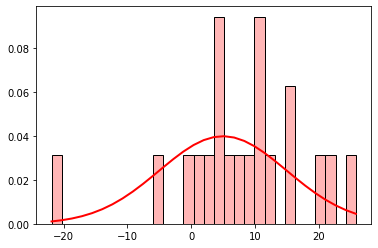

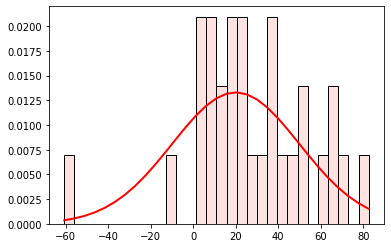

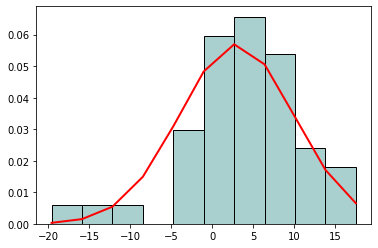

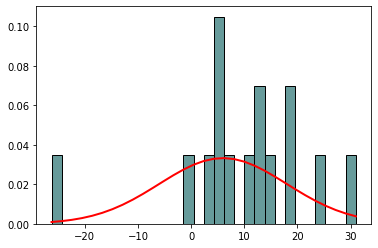

In [30]:
#Generemos un histograma para un mejor entendimiento de lo anterior
#Recuerda los valores de mu y sigma de cada conjunto de datos
#cuenta, cajas, ignorar =
%matplotlib inline 
import matplotlib.pyplot as plt

cuenta, cajas, ignorar = plt.hist(datos_1, 
         bins = 30,
         histtype='bar', 
         color='#ffb6b6',
         edgecolor = 'black',
         density = True)

normal1 = plt.plot(cajas, 1/(10 * np.sqrt(2 * np.pi)) *
          np.exp( - (cajas - 5)**2 / (2 * 10**2) ),
          linewidth=2, color='r')
plt.show()

cuenta, cajas, ignorar = plt.hist(datos_2, 
         bins = 30,
         histtype='bar', 
         color='#fde2e2',
         edgecolor = 'black',
         density = True)

normal2 = plt.plot(cajas, 1/(30 * np.sqrt(2 * np.pi)) *
          np.exp( - (cajas - 20)**2 / (2 * 30**2) ),
          linewidth=2, color='r')
plt.show()

cuenta, cajas, ignorar = plt.hist(datos_3, 
         bins = 10,
         histtype='bar', 
         color='#aacfcf',
         edgecolor = 'black',
         density = True)

normal3 = plt.plot(cajas, 1/(7 * np.sqrt(2 * np.pi)) *
          np.exp( - (cajas - 3)**2 / (2 * 7**2) ),
          linewidth=2, color='r')
plt.show()

cuenta, cajas, ignorar = plt.hist(datos_4, 
         bins = 30,
         histtype='bar', 
         color='#679b9b',
         edgecolor = 'black',
         density = True)

normal4 = plt.plot(cajas, 1/(12 * np.sqrt(2 * np.pi)) *
          np.exp( - (cajas - 6)**2 / (2 * 12**2) ),
          linewidth=2, color='r')
plt.show()

En esta sección se dará una breve introducción sobre este tema que puede causar muchos dolores de cabeza al estar aprendiendo acerca del manejo de datos. Aplicaremos la prueba de shapiro (W - Test) a los datos generados anteriormente.

Length of the sample data: 20, Test Statistic: 0.9344525337219238, p-value: 0.18801787495613098, Comments: 
Sample looks Gaussian (fail to reject H0),



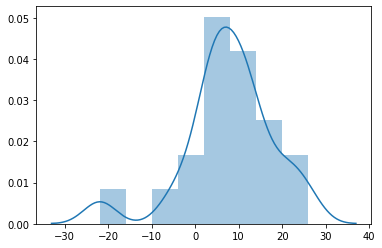

Length of the sample data: 30, Test Statistic: 0.9462665319442749, p-value: 0.13419266045093536, Comments: 
Sample looks Gaussian (fail to reject H0),



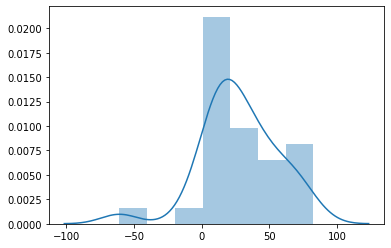

Length of the sample data: 45, Test Statistic: 0.9459115266799927, p-value: 0.03563256934285164, Comments: 
Sample does not look Gaussian (reject H0),



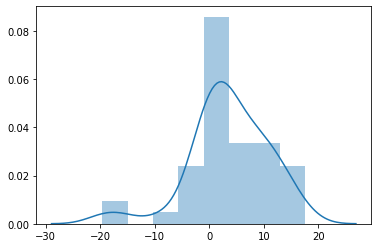

Length of the sample data: 15, Test Statistic: 0.8910361528396606, p-value: 0.06952477246522903, Comments: 
Sample looks Gaussian (fail to reject H0),



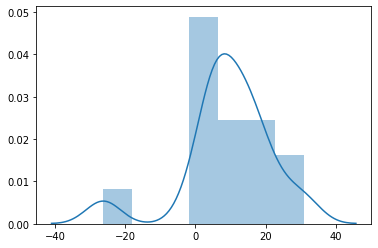

In [31]:
from scipy.stats import shapiro
def test_shapiro(data):
  stat, p = shapiro(data)
  alpha = 0.05
  if p > alpha:
      msg = '\nSample looks Gaussian (fail to reject H0)'
  else:
      msg = '\nSample does not look Gaussian (reject H0)'

  print(f'Length of the sample data: {len(data)}, Test Statistic: {stat}, p-value: {p}, Comments: {msg},\n')

  return sns.distplot(data)

test_shapiro(datos_1)
plt.show()
test_shapiro(datos_2)
plt.show()
test_shapiro(datos_3)
plt.show()
test_shapiro(datos_4)
plt.show()

A pesar de que existed diversas pruebas de discordancia para la detección de valores
atípicos, es una técnica que pocas veces se utiliza con este tipo de estadísticos.

Mayor información en el siguiente artículo: [Verma et al, 2008](https://dialnet.unirioja.es/servlet/articulo?codigo=2912581)

---

En el siguiente bloque, aplicaremos una técnica basada en Dixon Q test.

In [0]:
def q_test(dataset):
    return (dataset[1] - dataset[0])/(dataset[-1] - dataset[0])

def desicion(q_stat, q_ref):
  if q_stat > q_ref:
          print(f"Since our Q-statistic is {q_stat} and {q_stat} > {q_ref}, \nwe have evidence that our "
                "minimum point IS an outlier to the data.")
  else:
    print(f"Since our Q-statistic is {q_stat} and {q_stat} < {q_ref}, \nwe have evidence that our "
                "minimum point is NOT an outlier to the data.") 

Since our Q-statistic is 0.3506076446169551 and 0.3506076446169551 > 0.342, 
we have evidence that our minimum point IS an outlier to the data.


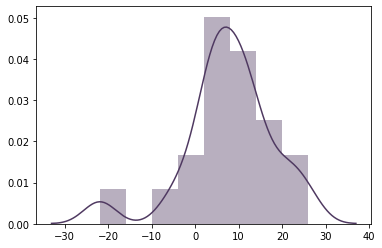

Since our Q-statistic is 0.3506076446169551 and 0.3506076446169551 > 0.29, 
we have evidence that our minimum point IS an outlier to the data.


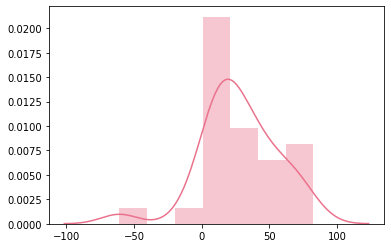

Since our Q-statistic is 0.10236219448904693 and 0.10236219448904693 < 0.29, 
we have evidence that our minimum point is NOT an outlier to the data.


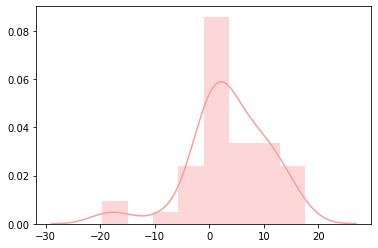

Since our Q-statistic is 0.4438862563908517 and 0.4438862563908517 > 0.384, 
we have evidence that our minimum point IS an outlier to the data.


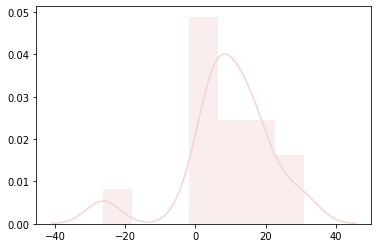

In [33]:
ax = sns.distplot(datos_1, color = '#4f3961')
q_ref = 0.342  # the reference Q value for a significance level of 95% and 20 data points
q_stat = q_test(np.sort(datos_1))
desicion(q_stat, q_ref)
plt.show()

ax = sns.distplot(datos_2, color = '#ea728c')
q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
q_stat = q_test(np.sort(datos_2))
desicion(q_stat, q_ref)
plt.show()

ax = sns.distplot(datos_3, color = '#fc9d9d')
q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
q_stat = q_test(np.sort(datos_3))
desicion(q_stat, q_ref)
plt.show()

ax = sns.distplot(datos_4, color = '#f3d4d4')
q_ref = 0.384  # the reference Q value for a significance level of 95% and 15 data points
q_stat = q_test(np.sort(datos_4))
desicion(q_stat, q_ref)
plt.show()

Hubo valores discordantes?

Las muestras si eran gaussianas?

Qué pruebas se pueden aplicar para muestras multivariadas?

Este ejercicio fue para ejemplificar como uno puede trabajar con cada muestra de forma univariada, 
algo importante en el tratamiento estadístico de los datos.

Recordar que siempre es necesario aplicar pruebas de normalidad con datos experimentales,
para posteriormente realizar limpieza de los mismos, estos se deben considerar los pasos 
esenciales previo a cualquier análisis estadístico de los datos.

Se presentaron **datos discordantes** en los datos: datos_1, datos_2 y datos_4 de acuerdo con la prueba de **Dixon Q test**. Apliqué la prueba de **shapiro** y, para los datos datos_3 da como resultado que la muestra no es gaussiana mientras que para el resto de los datos si.
Para muestras multivariadas aplicaría de Mann-Whitney-Wilcoxon, prueba de suma de rangos Wilcoxon, o prueba de Wilcoxon-Mann-Whitney) es una prueba no paramétrica aplicada a dos muestras independientes. 
Análisis Factorial y Componentes Principales son dos técnicas que nos permiten visualizar la independencia entre los datos,